In [46]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [47]:
# Getting a dataset (Fashion MNIST)
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


In [48]:
len(train_data), len(test_data)

(60000, 10000)

In [49]:
# First training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [50]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [51]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [52]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

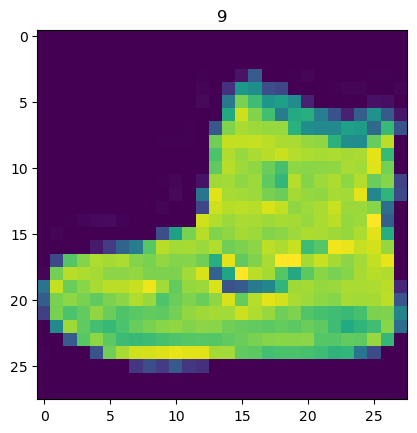

In [53]:
# Visualizing our data
plt.imshow(image.squeeze())
plt.title(label);

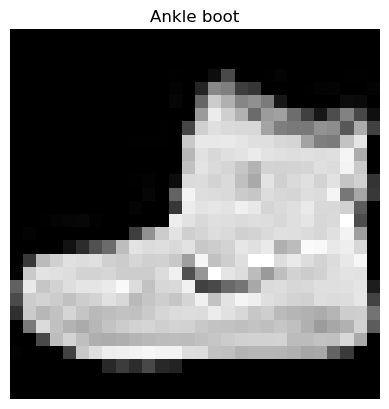

In [54]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

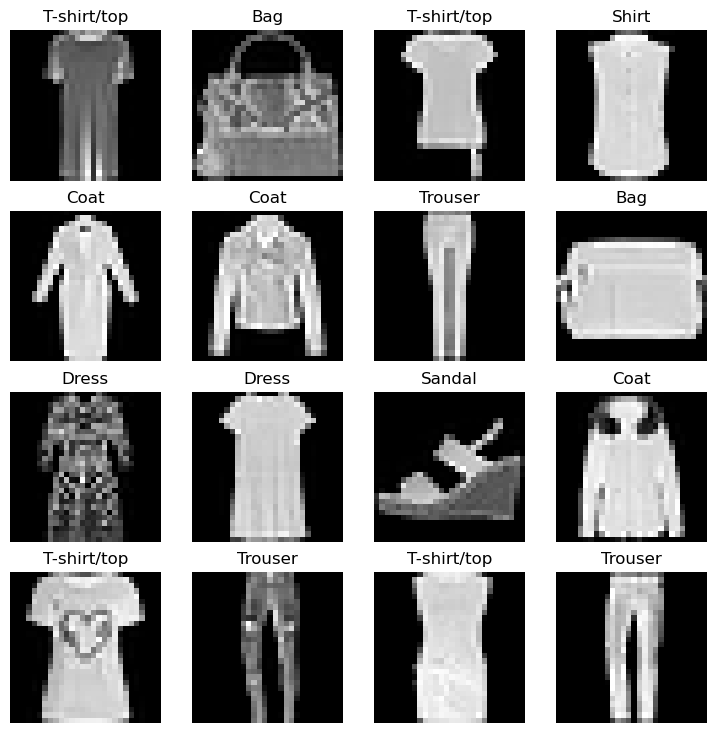

In [55]:
# Plot random images from dataset
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [56]:
# Dataloader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x148770760>,
 <torch.utils.data.dataloader.DataLoader at 0x14853ffa0>)

In [57]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])
tensor(0) torch.Size([])


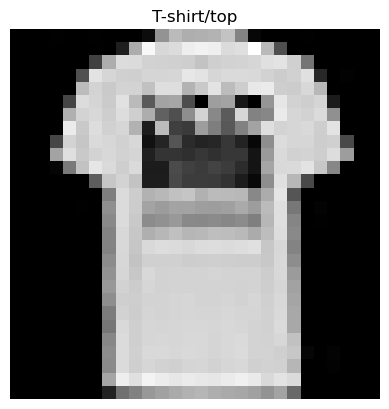

In [58]:
# Sample from a batch
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(img.shape)
print(label, label.shape)

In [59]:
# Model 0: baseline

# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)
output.shape

torch.Size([1, 784])

In [60]:
class FashionMNISTModelV0(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)
    

In [61]:
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [63]:
import requests
from pathlib import Path

# download helper functions
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    requests = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(requests.content)

helper_functions.py already exists, skipping download...


In [64]:
# import accuracy metric
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [65]:
# time our experiments
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device} : {total_time:.3f} seconds")
    return total_time

In [66]:
from tqdm.auto import tqdm

train_time_start_on_cpu = timer()

epochs = 3

# training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n----")

    # training
    train_loss = 0

    # loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # forward pass
        y_pred = model_0(X)

        # calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss

        # optimizer zero grad
        optimizer.zero_grad()

        # loss backward
        loss.backward()

        # optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)} / {len(train_dataloader.dataset)} samples.")

    # divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # forward pss
            test_pred = model_0(X_test)

            # calculate loss
            test_loss += loss_fn(test_pred, y_test)

            # calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # test loss average per batch
        test_loss /= len(test_dataloader)

        # test acc average per batch
        test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")


train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters())))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 33%|███▎      | 1/3 [00:01<00:03,  1.81s/it]


Train loss: 0.5934 | Test loss: 0.4913, Test acc: 82.4681
Epoch: 1
----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


 67%|██████▋   | 2/3 [00:03<00:01,  1.79s/it]


Train loss: 0.4783 | Test loss: 0.4696, Test acc: 83.4165
Epoch: 2
----
Looked at 0 / 60000 samples.
Looked at 12800 / 60000 samples.
Looked at 25600 / 60000 samples.
Looked at 38400 / 60000 samples.
Looked at 51200 / 60000 samples.


100%|██████████| 3/3 [00:05<00:00,  1.82s/it]


Train loss: 0.4548 | Test loss: 0.4743, Test acc: 83.2268
Train time on Parameter containing:
tensor([[ 0.0029,  0.0056,  0.0235,  ..., -0.0627, -0.0271,  0.0229],
        [ 0.0210,  0.0217, -0.0129,  ..., -0.0891, -0.0453,  0.0143],
        [ 0.0347,  0.0079,  0.0002,  ...,  0.0542,  0.0359,  0.0283],
        ...,
        [-0.0160,  0.0230,  0.0009,  ...,  0.0205, -0.0025,  0.0063],
        [-0.0080, -0.0083,  0.0089,  ...,  0.0580,  0.0610,  0.0092],
        [ 0.0117,  0.0089,  0.0014,  ...,  0.0383,  0.0303,  0.0166]],
       requires_grad=True) : 5.464 seconds


In [68]:
# predictions

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    
    loss, acc = 0, 0

    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
    
            y_pred = model(X)

            # accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))
            
        # scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, 
            "model_loss": loss.item(),
            "model_acc": acc}


model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47430258989334106,
 'model_acc': 83.22683706070288}